In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data, need time, distance, weights
def read_colvar(file_name):
    with open(file_name) as f:
        first_line = f.readline()
    fl = first_line[10:-1]
    names = fl.split()
    df = pd.read_csv(file_name,delim_whitespace=True, names=names, comment='#')
    return df

nophos = read_colvar('COLVAR_nophos')
phos = read_colvar('COLVAR_phos')

In [3]:
nophos

,time,d,L11,L14,L15,L17,L18,L111,L112,L114,...,L1212,L1214,L1414,IONCL1,IONCL2,rg1,rg2,uwall.bias,uwall.force2,pbmetad.bias
0,0.0,4.692601,4.566730,4.799612,4.355445,4.316389,4.599240,4.683845,4.312189,4.249774,...,4.114861,3.951140,3.682427,0.000000,0.113309,0.919229,0.911522,0.0,0.0,235.969961
1,1.0,4.617079,4.475326,4.855577,4.518589,4.228825,4.532934,4.436747,4.101892,4.111822,...,4.046557,3.944854,3.577203,0.000000,0.108762,0.932411,0.926904,0.0,0.0,236.118407
2,2.0,4.591162,4.765923,4.756239,4.558491,4.285303,4.477390,4.406933,3.947955,4.058683,...,4.057206,4.003001,3.614911,0.000000,0.204184,0.936569,0.912736,0.0,0.0,236.145165
3,3.0,4.560930,4.768787,4.824777,4.588029,4.305206,4.438198,4.338600,3.981857,3.851758,...,3.929852,3.700457,3.787219,0.000000,0.164612,0.949764,0.931798,0.0,0.0,236.173633
4,4.0,4.619138,4.609353,4.833821,4.576061,4.411006,4.625631,4.309195,3.949273,3.976259,...,3.903986,3.860664,3.742326,0.000000,0.232145,0.931339,0.944227,0.0,0.0,236.038141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730490,730490.0,4.803637,3.782646,4.375994,3.978671,4.556295,4.543920,4.846017,4.330239,4.829952,...,4.548745,4.287772,4.108114,0.000028,0.000000,0.995916,0.920684,0.0,0.0,234.940286
730491,730491.0,4.814400,3.781229,4.316163,3.975328,4.633750,4.571884,4.718577,4.282484,4.780212,...,4.495401,4.220723,4.092538,0.000028,0.000000,1.009366,0.925245,0.0,0.0,234.845360
730492,730492.0,4.815390,3.881963,4.128967,4.006276,4.572196,4.373383,4.556252,4.069164,4.624384,...,4.470188,4.117456,4.168518,0.000009,0.000000,1.012330,0.888699,0.0,0.0,234.890334
730493,730493.0,4.812797,3.938122,4.126886,4.242549,4.702770,4.286786,4.663522,4.051313,4.673872,...,4.511052,4.287922,4.087531,0.000000,0.000000,0.997686,0.898299,0.0,0.0,234.899977


In [4]:
# rearranging the no phosphate data to suit my needs
labels = list(range(2,44))
#nophos = nophos.drop(labels=nophos.columns[labels],axis=1)
index_names_0 = nophos[ (nophos['d'] >= 1.75) ].index 
nophos = nophos.drop(index_names_0, axis=0) 
index_names_1 = nophos[ (nophos['d'] <= 1.25) ].index 
nophos = nophos.drop(index_names_1, axis=0)
nophos = nophos.sort_values('pbmetad.bias', ascending=False)
nophos=nophos.reset_index(drop=True)

In [5]:
nophos

,time,d,L11,L14,L15,L17,L18,L111,L112,L114,...,L1212,L1214,L1414,IONCL1,IONCL2,rg1,rg2,uwall.bias,uwall.force2,pbmetad.bias
0,257983.0,1.686575,3.064321,2.170410,2.636464,3.404727,2.988263,3.271375,3.041657,2.975366,...,1.964371,1.972324,1.127221,0.000066,0.005169,0.769360,0.945601,0.0,0.0,233.734141
1,97743.0,1.686836,1.620572,2.697812,2.625919,2.014593,2.133609,3.026238,3.103634,3.883027,...,1.922316,2.811705,2.120420,0.090959,0.007686,0.917883,0.718013,0.0,0.0,233.730930
2,257984.0,1.658267,3.002243,2.178433,2.659912,3.395928,3.033219,3.240886,3.099397,2.991168,...,1.949535,2.014193,1.203696,0.018979,0.003409,0.787854,0.961587,0.0,0.0,233.715954
3,257982.0,1.675003,3.019630,2.193653,2.661069,3.510495,3.024073,3.161958,3.026847,3.083259,...,1.746784,1.923830,1.170842,0.003575,0.003997,0.794554,0.925261,0.0,0.0,233.714522
4,257986.0,1.668742,2.872304,2.110294,2.613507,3.336908,2.791555,3.168278,2.968392,2.744932,...,2.035737,2.032904,1.198440,0.009260,0.005439,0.797549,0.945052,0.0,0.0,233.700053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57071,231582.0,1.492050,2.211732,1.942256,1.430229,1.725926,1.444692,2.213227,2.634611,2.452932,...,2.358602,2.745549,2.282254,0.000000,0.000503,0.711118,0.981562,0.0,0.0,108.835195
57072,231578.0,1.389906,1.771462,1.485821,1.271075,1.580935,1.250487,2.040152,2.471980,2.191947,...,2.256293,2.461158,2.202127,0.000000,0.000905,0.715429,0.952921,0.0,0.0,105.720312
57073,258447.0,1.703223,2.590458,2.401900,2.322999,3.114877,3.309933,3.511156,3.369246,2.424579,...,1.974533,1.061399,0.316775,0.073933,0.000000,0.744566,0.886757,0.0,0.0,102.845595
57074,258446.0,1.655259,2.616513,2.503443,2.188524,3.064705,3.234619,3.449022,3.328213,2.364004,...,1.946937,1.049746,0.315410,0.045131,0.000000,0.755186,0.897422,0.0,0.0,98.449463


In [6]:
# rearranging the phosphate data to suit my needs
#phos = phos.drop(labels=phos.columns[labels],axis=1)
index_names_2 = phos[ (phos['d'] >= 1.75) ].index 
phos = phos.drop(index_names_2, axis=0) 
index_names_3 = phos[ (phos['d'] <= 1.25) ].index 
phos = phos.drop(index_names_3, axis=0)
phos = phos.sort_values('pbmetad.bias',ascending=False)
phos=phos.reset_index(drop=True)

In [7]:
phos

,time,d,L11,L14,L15,L17,L18,L111,L112,L114,...,L1212,L1214,L1414,IONCD1,IONCD2,rg1,rg2,uwall.bias,uwall.force2,pbmetad.bias
0,668308.0,1.573173,2.223152,2.387505,2.142463,2.184305,2.193246,2.708151,2.704069,2.163731,...,2.793108,2.520272,2.693400,0.375111,0.337446,0.749848,0.818256,0.0,0.0,249.300423
1,683697.0,1.590945,2.909281,2.473550,2.110088,2.586535,2.582956,2.566844,2.244980,2.038261,...,2.962667,2.554923,2.271366,0.432485,0.407569,0.748839,0.838102,0.0,0.0,249.280426
2,668296.0,1.543402,2.300587,2.270953,2.154986,2.302143,2.241368,2.698680,2.657859,2.209725,...,2.527025,2.586493,3.025416,0.339589,0.367181,0.759227,0.873877,0.0,0.0,249.274089
3,668305.0,1.567008,2.082865,2.235751,1.981116,2.103688,2.101995,2.560157,2.561585,2.049467,...,2.761849,2.589847,2.846830,0.347796,0.363900,0.750621,0.834058,0.0,0.0,249.273367
4,668318.0,1.581469,2.082561,2.229930,2.073887,2.069649,2.071852,2.673365,2.593623,2.134066,...,2.653550,2.584215,2.996295,0.396568,0.344900,0.765063,0.809835,0.0,0.0,249.272138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209466,687738.0,1.675095,2.228106,1.960605,1.617916,2.181840,2.162422,2.157036,1.656375,1.542977,...,2.966574,2.750761,2.818183,0.244006,1.981482,0.726621,0.741748,0.0,0.0,67.772012
209467,332419.0,1.318086,1.759348,1.287755,1.923793,2.284328,1.759128,1.738656,2.130344,1.810598,...,1.057867,1.086678,1.282755,0.000000,0.039281,0.789302,0.932329,0.0,0.0,66.967407
209468,687741.0,1.621356,2.213684,1.902275,1.589773,2.142560,1.922798,2.098283,1.549951,1.392648,...,2.947389,2.676476,2.778626,0.210761,2.055944,0.745937,0.751025,0.0,0.0,49.310585
209469,687746.0,1.687848,2.197121,1.970016,1.771971,2.239260,2.172234,2.304310,1.770016,1.614249,...,3.061252,2.783573,2.679046,0.207536,2.056908,0.721662,0.726361,0.0,0.0,49.081696


In [8]:
kt = 2.49
wts = np.exp(phos['pbmetad.bias'].values/kt)/(np.sum(np.exp(phos['pbmetad.bias'].values/kt)))

In [9]:
np.sum(wts)

1.0

In [10]:
phos['weights'] = wts

In [11]:
phos

,time,d,L11,L14,L15,L17,L18,L111,L112,L114,...,L1214,L1414,IONCD1,IONCD2,rg1,rg2,uwall.bias,uwall.force2,pbmetad.bias,weights
0,668308.0,1.573173,2.223152,2.387505,2.142463,2.184305,2.193246,2.708151,2.704069,2.163731,...,2.520272,2.693400,0.375111,0.337446,0.749848,0.818256,0.0,0.0,249.300423,1.162975e-05
1,683697.0,1.590945,2.909281,2.473550,2.110088,2.586535,2.582956,2.566844,2.244980,2.038261,...,2.554923,2.271366,0.432485,0.407569,0.748839,0.838102,0.0,0.0,249.280426,1.153672e-05
2,668296.0,1.543402,2.300587,2.270953,2.154986,2.302143,2.241368,2.698680,2.657859,2.209725,...,2.586493,3.025416,0.339589,0.367181,0.759227,0.873877,0.0,0.0,249.274089,1.150740e-05
3,668305.0,1.567008,2.082865,2.235751,1.981116,2.103688,2.101995,2.560157,2.561585,2.049467,...,2.589847,2.846830,0.347796,0.363900,0.750621,0.834058,0.0,0.0,249.273367,1.150406e-05
4,668318.0,1.581469,2.082561,2.229930,2.073887,2.069649,2.071852,2.673365,2.593623,2.134066,...,2.584215,2.996295,0.396568,0.344900,0.765063,0.809835,0.0,0.0,249.272138,1.149839e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209466,687738.0,1.675095,2.228106,1.960605,1.617916,2.181840,2.162422,2.157036,1.656375,1.542977,...,2.750761,2.818183,0.244006,1.981482,0.726621,0.741748,0.0,0.0,67.772012,2.536355e-37
209467,332419.0,1.318086,1.759348,1.287755,1.923793,2.284328,1.759128,1.738656,2.130344,1.810598,...,1.086678,1.282755,0.000000,0.039281,0.789302,0.932329,0.0,0.0,66.967407,1.836007e-37
209468,687741.0,1.621356,2.213684,1.902275,1.589773,2.142560,1.922798,2.098283,1.549951,1.392648,...,2.676476,2.778626,0.210761,2.055944,0.745937,0.751025,0.0,0.0,49.310585,1.528452e-40
209469,687746.0,1.687848,2.197121,1.970016,1.771971,2.239260,2.172234,2.304310,1.770016,1.614249,...,2.783573,2.679046,0.207536,2.056908,0.721662,0.726361,0.0,0.0,49.081696,1.394216e-40


array([[<AxesSubplot:title={'center':'weights'}>]], dtype=object)

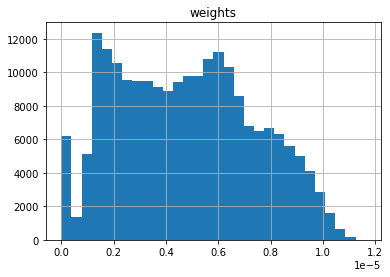

In [12]:
phos.hist('weights', bins=30)

In [32]:
cumsum = np.cumsum(wts)

In [60]:
np.linspace(0,209471,209471)

array([0.00000000e+00, 1.00000477e+00, 2.00000955e+00, ...,
       2.09469000e+05, 2.09470000e+05, 2.09471000e+05])

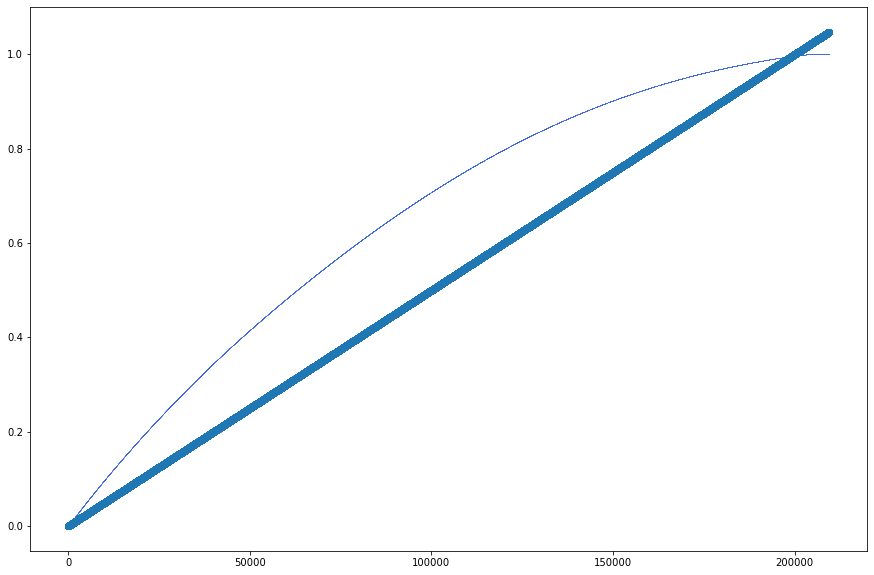

In [61]:
index = range(0,209471)
x = np.linspace(0, 209471,209471)
y = 1/200000*(x)
plt.figure(figsize=(15,10))
plt.scatter(index, cumsum, s= 0.0001, color='royalblue')
plt.scatter(x,y)

In [5]:
# setting up for no phosphate
num_bins = 30
counts, bin_edges = np.histogram(nophos['pbmetad.bias'].values, bins=num_bins, density=True)
flipped_counts = np.flipud(counts)
cdf = np.cumsum(flipped_counts*np.diff(bin_edges))
cdf = np.insert(cdf,0,0)

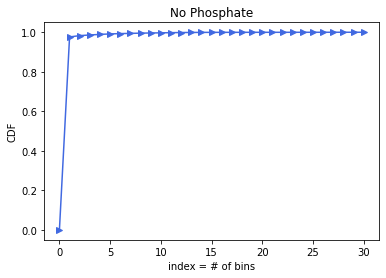

In [6]:
# Plot CDF of weights (y-axis) and index
bins = range(0,num_bins+1)
plt.plot (bins, cdf, '->', color='royalblue') 
plt.xlabel('index = # of bins')
plt.ylabel('CDF')
plt.title('No Phosphate')
plt.show()

In [18]:
print(bin_edges[num_bins])

249.300423


In [19]:
num_bins = 30
counts, bin_edges = np.histogram(phos['pbmetad.bias'].values, bins=num_bins, density=True)
flipped_counts = np.flipud(counts)
cdf = np.cumsum(flipped_counts*np.diff(bin_edges))
cdf = np.insert(cdf,0,0)

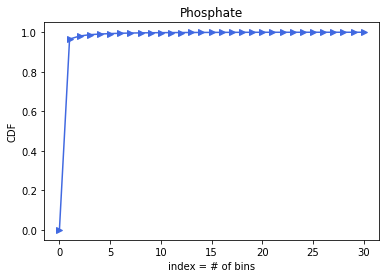

In [20]:
# Plot CDF of weights (y-axis) and index
bins = range(0,num_bins+1)
plt.plot (bins, cdf, '->', color='royalblue') 
plt.xlabel('index = # of bins')
plt.ylabel('CDF')
plt.title('Phosphate')
plt.show()

In [21]:
print(bin_edges[num_bins])

249.300423
